# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Dataset Description
This dataset employs a binary variable to indicate whether a credit card payment occurred (1 = Yes, 0 = No). The study selected the following 23 factors as explanatory variables:

- Variable 1: Amount of credit granted (in local currency), which includes both individual credit and family (supplementary) credit.
- Variable 2: Gender (1 = male; 2 = female).
- Variable 3: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Variable 4: Age (years).
- Variables 5-10: Payment history over several months. The scale for payment status ranges from -1 (paid on time) to 9 (delayed by nine months or more). It tracks payments from April to September:

    - Variable 5: Payment status in September;
    - Variable 6: Payment status in August;
    - Variable 7: Payment status in July;
    - Variable 8: Payment status in June;
    - Variable 9: Payment status in May;
    - Variable 10: Payment status in April. 
- Variables 11-16: Amount of monthly billing (in local currency), tracking statements from September to April.
- Variables 17-22: Amount of previous payments (in local currency), corresponding to monthly payments made from September to April.

## Inspecting the data

any comment about data dimensionality/distribution goes here

In [1]:
# import librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# carichiamo il dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# mostra prime righe del dataset train
df_train_data = train_data.head() 
print(df_train_data)

      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  19193     200000    2          1         1   38     -2     -2     -2   
1   1131     230000    2          2         1   34      0      0      0   
2  17557      50000    2          2         2   42      0      0      0   
3  29901      20000    1          2         2   29      0      0     -2   
4  14696      30000    2          3         1   59      1      2      2   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...       2571       2571       2571      2772      2571      2571   
1      0  ...     155335     153427     150514      8913      5449      5339   
2      0  ...      49311      24663      24854      1763      2112      1756   
3     -2  ...          0          0          0         0         0         0   
4      2  ...      30467      29858      28898      1950       200      2492   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

In [4]:
# Controlla la dimensionalità del dataset di training e test
print("Dimensionalità del dataset di training:", train_data.shape)
print("Dimensionalità del dataset di test:", test_data.shape)

Dimensionalità del dataset di training: (25500, 25)
Dimensionalità del dataset di test: (4500, 24)


In [5]:
df_train_data.info() # otteniamo informazioni sulle colonne

missing_values = df_train_data.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          5 non-null      int64
 1   LIMIT_BAL                   5 non-null      int64
 2   SEX                         5 non-null      int64
 3   EDUCATION                   5 non-null      int64
 4   MARRIAGE                    5 non-null      int64
 5   AGE                         5 non-null      int64
 6   PAY_0                       5 non-null      int64
 7   PAY_2                       5 non-null      int64
 8   PAY_3                       5 non-null      int64
 9   PAY_4                       5 non-null      int64
 10  PAY_5                       5 non-null      int64
 11  PAY_6                       5 non-null      int64
 12  BILL_AMT1                   5 non-null      int64
 13  BILL_AMT2                   5 non-null      int64
 14  BILL_AMT3     

In [6]:
# otteniamo statistiche descrittive per le variabili numeriche 
print(df_train_data.describe())

                ID      LIMIT_BAL       SEX  EDUCATION  MARRIAGE        AGE  \
count      5.00000       5.000000  5.000000   5.000000  5.000000   5.000000   
mean   16495.60000  106000.000000  1.800000   2.000000  1.400000  40.400000   
std    10337.03027  100647.901121  0.447214   0.707107  0.547723  11.458621   
min     1131.00000   20000.000000  1.000000   1.000000  1.000000  29.000000   
25%    14696.00000   30000.000000  2.000000   2.000000  1.000000  34.000000   
50%    17557.00000   50000.000000  2.000000   2.000000  1.000000  38.000000   
75%    19193.00000  200000.000000  2.000000   2.000000  2.000000  42.000000   
max    29901.00000  230000.000000  2.000000   3.000000  2.000000  59.000000   

          PAY_0     PAY_2    PAY_3    PAY_4  ...      BILL_AMT4  \
count  5.000000  5.000000  5.00000  5.00000  ...       5.000000   
mean  -0.200000  0.000000 -0.40000 -0.40000  ...   47536.800000   
std    1.095445  1.414214  1.67332  1.67332  ...   63633.026615   
min   -2.000000 -2.0

In [7]:
# controllo presenza di valori nulli
df_train_data.isnull().sum().any()

np.False_

In [8]:
# controllo di presenza di valori duplicati
df_train_data.duplicated().sum()

np.int64(0)

### Analisi statica univariata

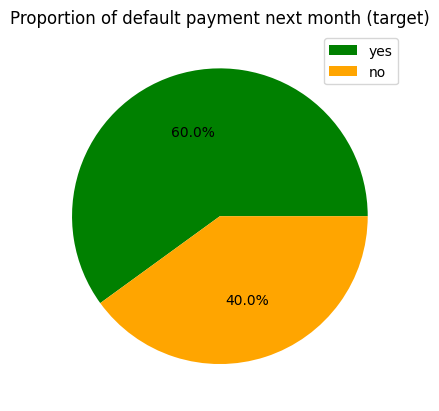

In [9]:
column = 'default payment next month'
total_rows = len(df_train_data)
counts = df_train_data[column].value_counts()
percentages = [count / total_rows * 100 for count in counts]
plt.pie(percentages, autopct='%1.1f%%', colors=['green', 'orange'])
plt.title(f'Proportion of {column} (target)')
labels = ['yes', 'no']
plt.legend(labels=labels, loc='upper right')
plt.show()

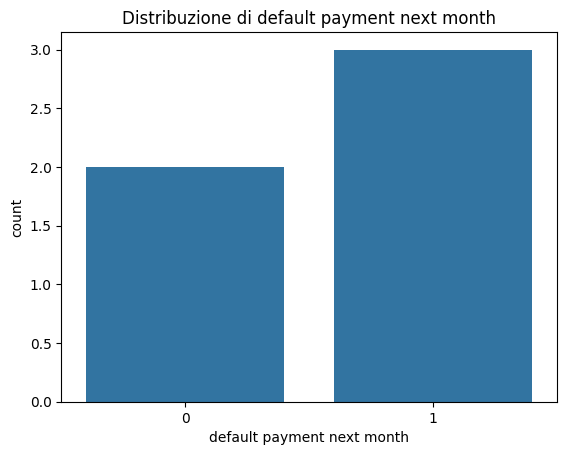

In [10]:
# Analisi della variabile target
# Conta la distribuzione della variabile target
sns.countplot(x='default payment next month', data=df_train_data)
plt.title('Distribuzione di default payment next month')
plt.show()

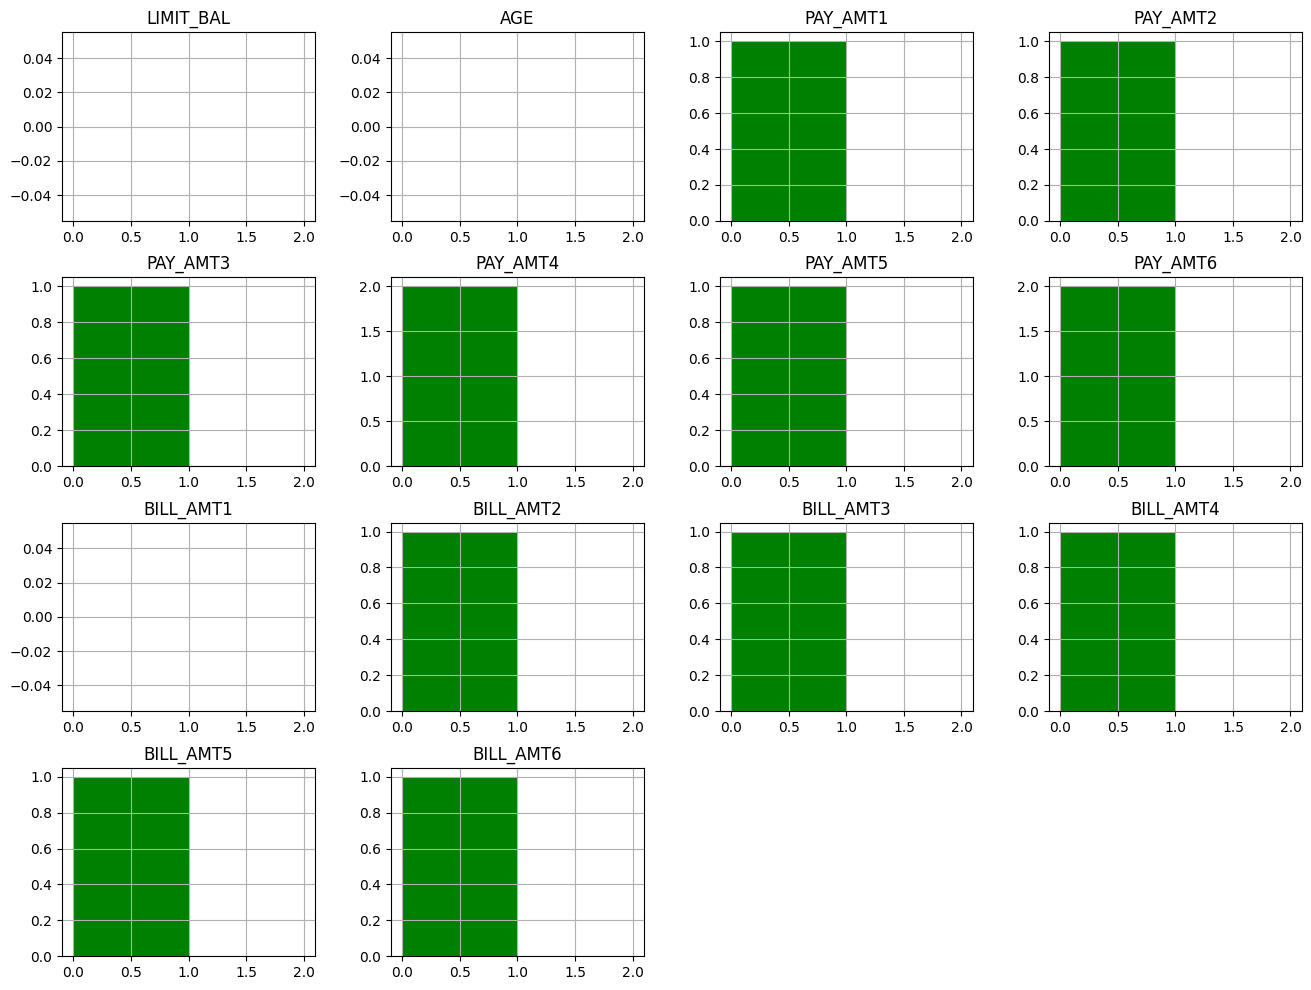

In [11]:
# distribuzione delle feature numeriche 

numerical_columns = ['LIMIT_BAL', 'AGE', 
                     'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Istogramma per ogni variabile numerica
bins = np.arange(df_train_data[column].min(), df_train_data[column].max() + 2)
df_train_data[numerical_columns].hist(figsize=(16, 12), bins=bins, color='green')

#df_train_data[numerical_columns].hist(figsize=(16, 12), bins=20, color='green')
plt.show()

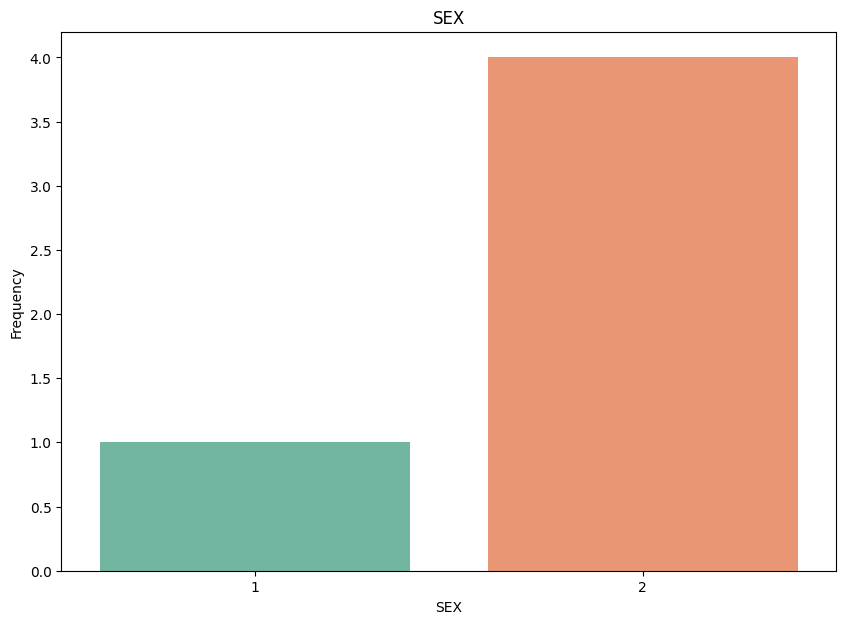

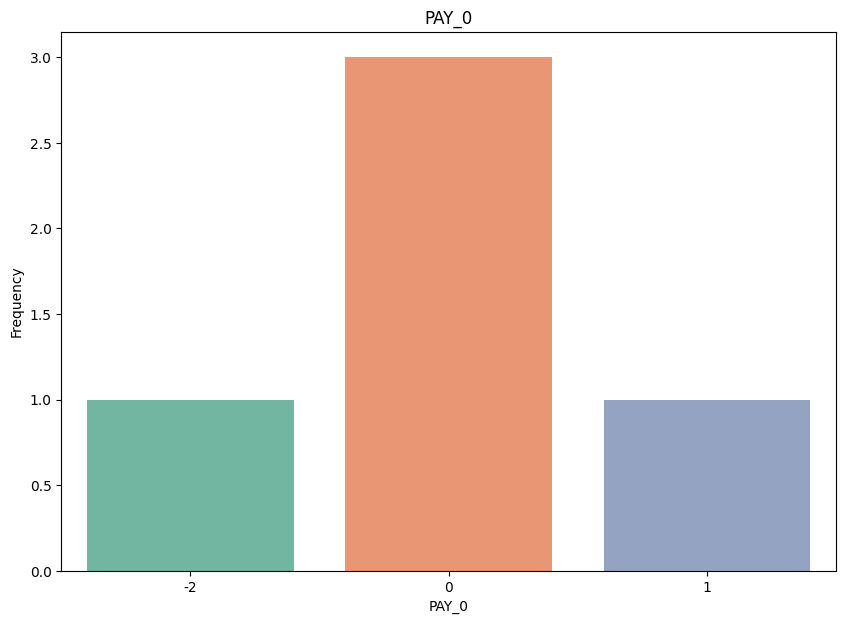

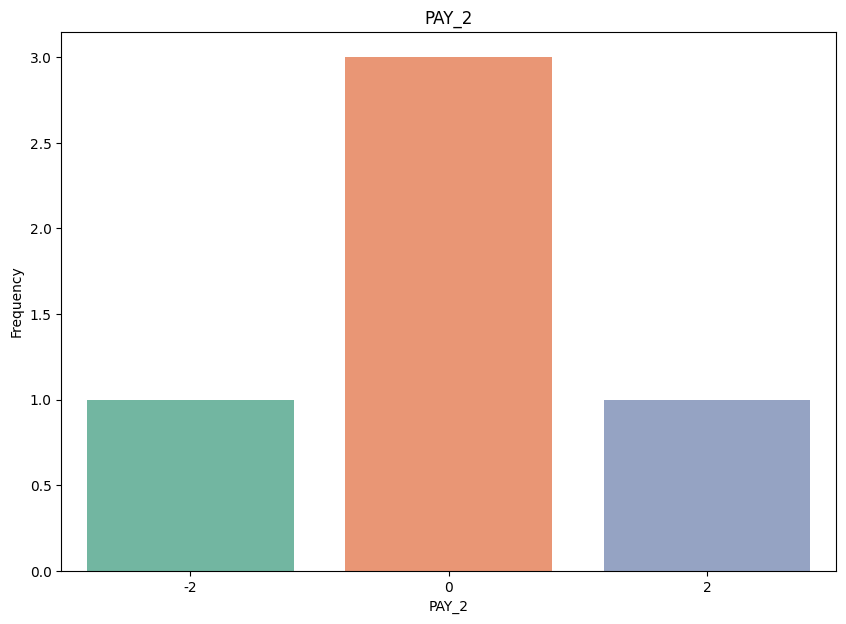

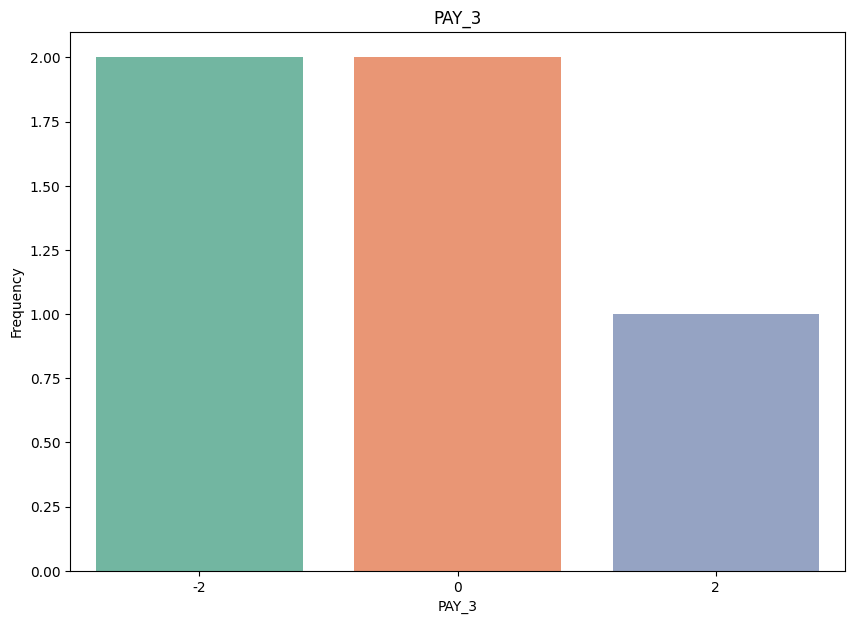

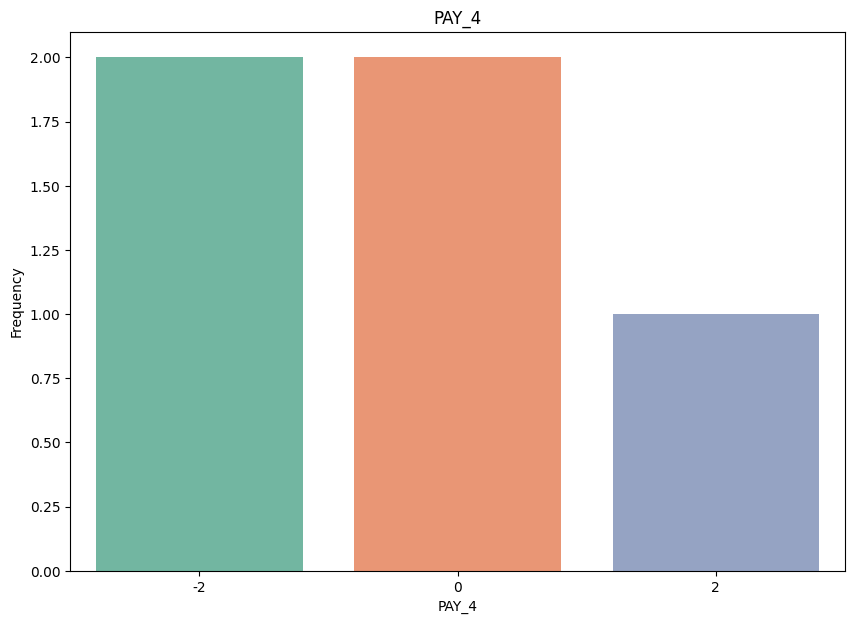

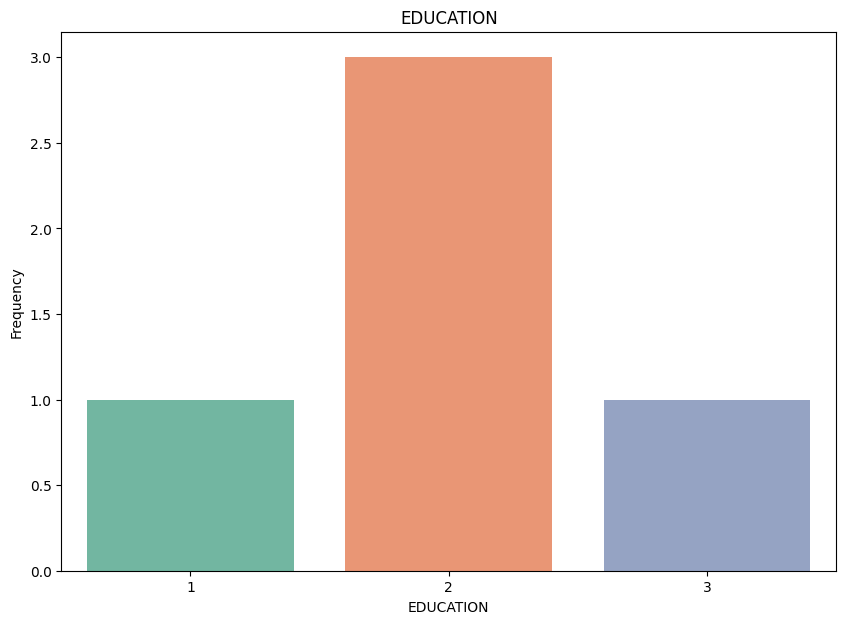

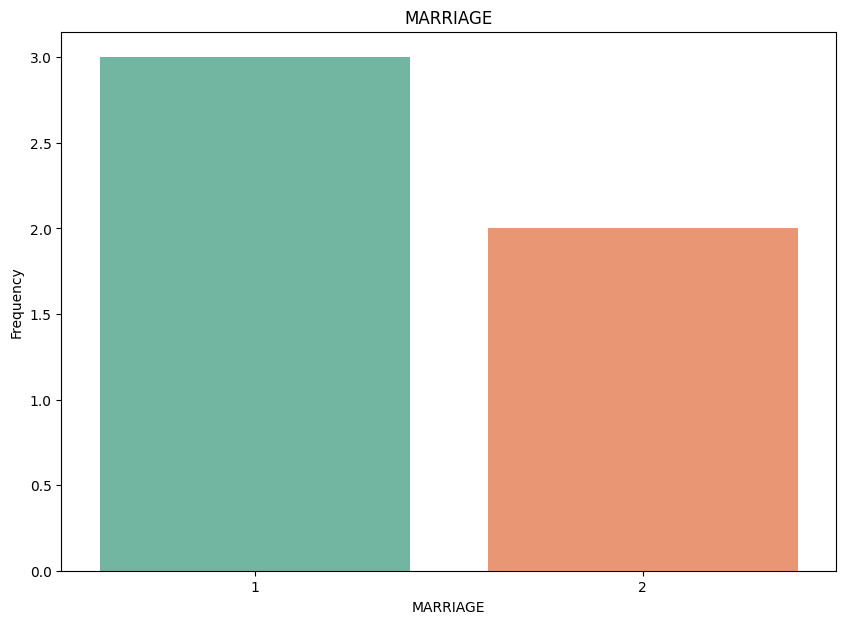

In [12]:

# distribuzione feature categoriche 
categorical_columns = ['SEX', 
                       'PAY_0', 'PAY_2','PAY_3','PAY_4',
                       'EDUCATION', 'MARRIAGE']

def print_categoric_feature(column):
    plt.figure(figsize=(10, 7))
    #sns.countplot(data=df_train_data, x=column, color='orange', legend=True)
    sns.countplot(data=df_train_data, x=column, hue=column, palette='Set2', legend=False)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for i in categorical_columns:
    print_categoric_feature(i)

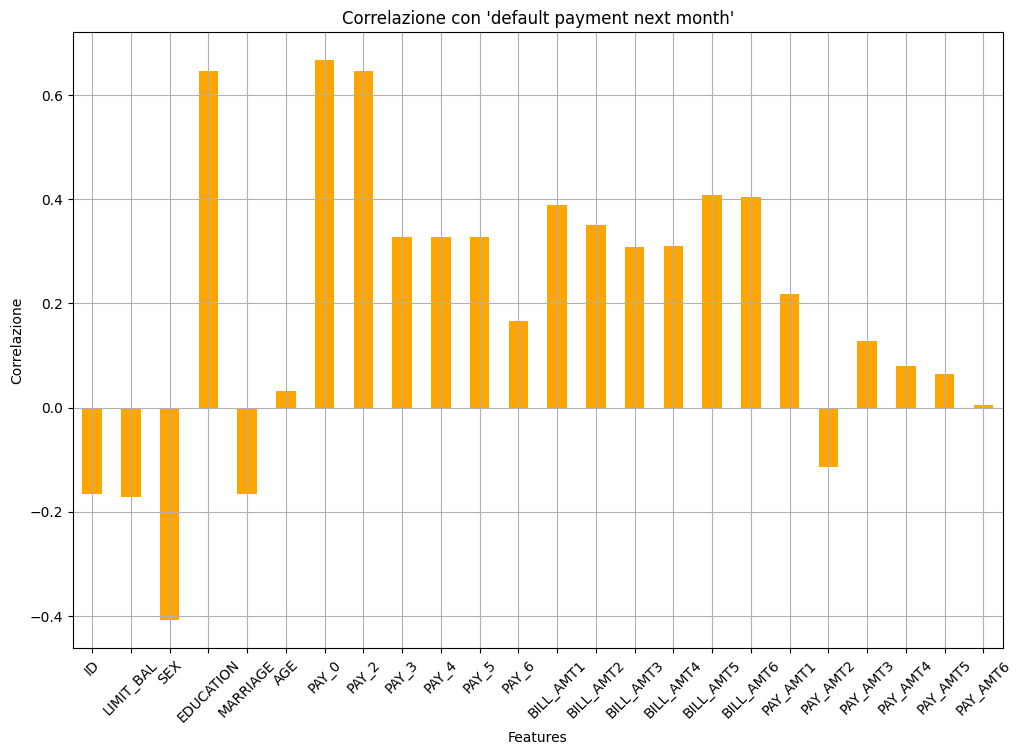

In [13]:
# Calcola la correlazione tra ogni feature e il target
correlation = df_train_data.drop('default payment next month', axis=1).corrwith(df_train_data['default payment next month'])

# Crea un grafico a barre per visualizzare le correlazioni
plt.figure(figsize=(12, 8))
correlation.plot(kind='bar', grid=True, color='orange')
plt.title("Correlazione con 'default payment next month'")
plt.xlabel("Features")
plt.ylabel("Correlazione")
plt.xticks(rotation=45)
plt.show()


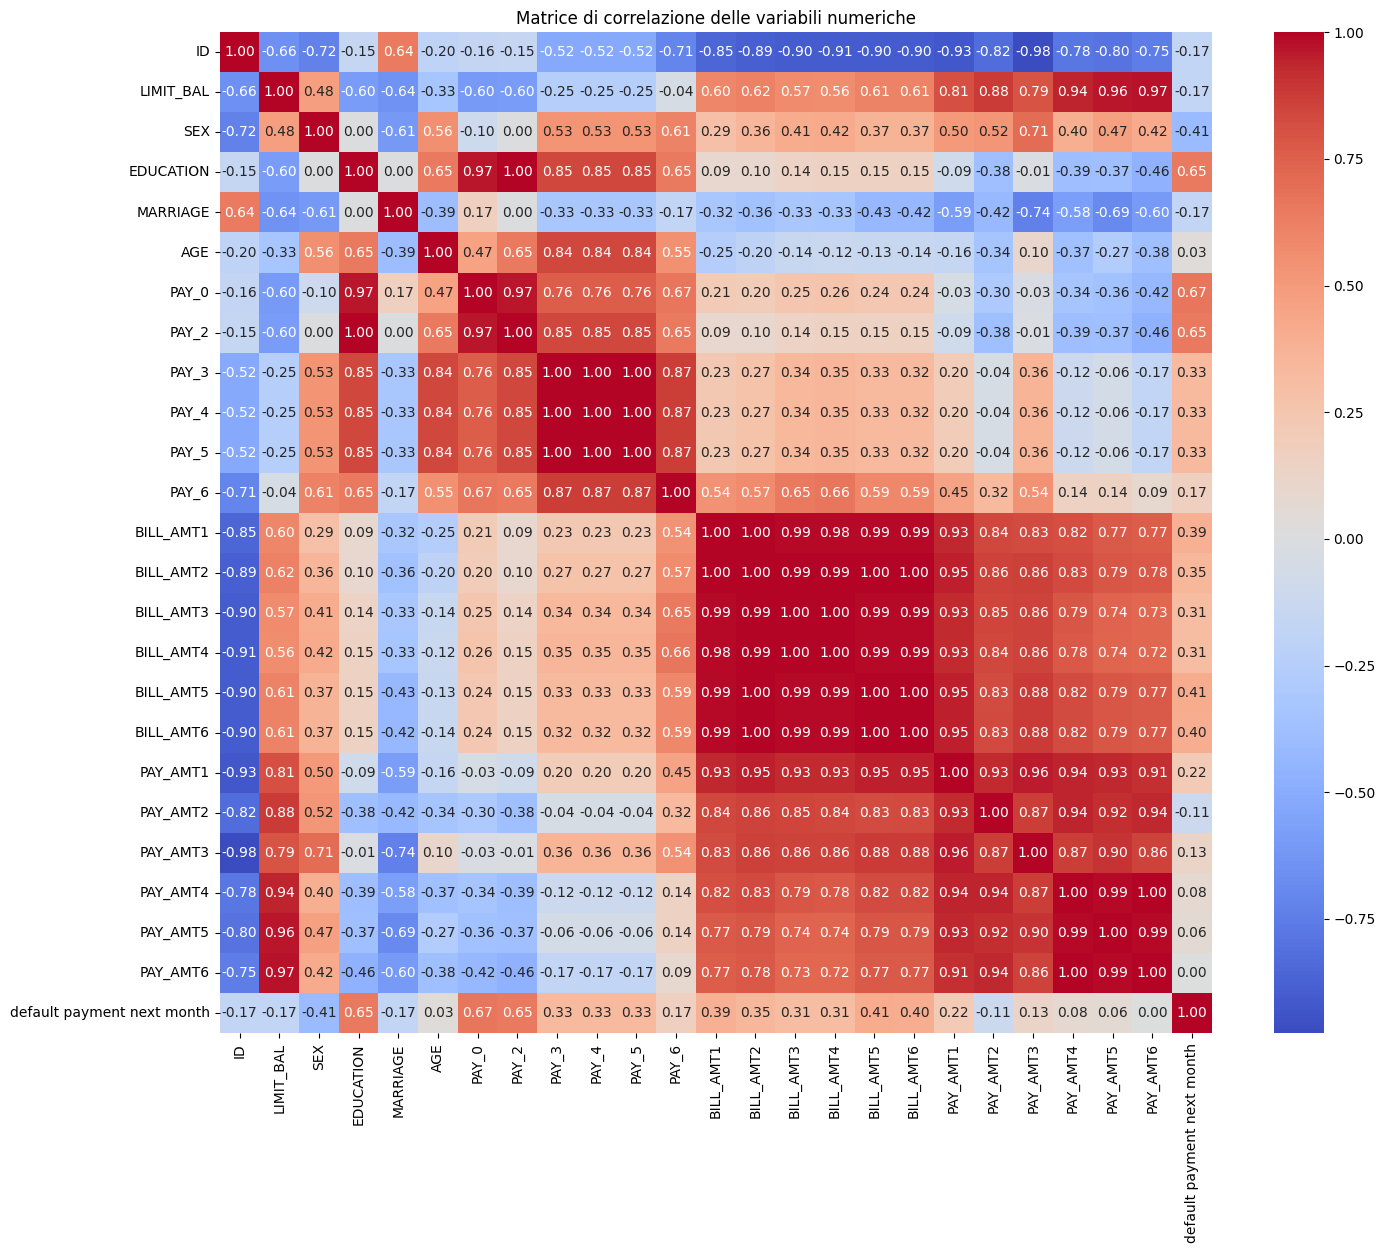

In [14]:
# relazioni tra variabili
# Mappa di correlazione
plt.figure(figsize=(16, 13))
correlation_matrix = df_train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione delle variabili numeriche')
plt.show()


## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

## Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. optimizer choice, final activations, loss functions, training metrics)

### Con il dataset grezzo

In [15]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD


In [16]:
# Estrazione delle features e variabile target
y = df_train_data['default payment next month']
X = df_train_data.drop(columns=['default payment next month'])

In [17]:
# Suddivisione dataset in training set e test set (con dimensione del test_size del 30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = to_categorical(y_train, num_classes=3)

In [18]:
nb_classes = y_train.shape[0]
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(X_train.shape, 'dims Training set')

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

3 classes
(3, 24) dims Training set


In [19]:
optimizer1 = SGD(learning_rate=0.001)

model.compile(optimizer=optimizer1, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history1 = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.0000e+00 - loss: 1.3006 - val_accuracy: 1.0000 - val_loss: 0.4793
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 1.2915 - val_accuracy: 1.0000 - val_loss: 0.4817
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 1.2825 - val_accuracy: 1.0000 - val_loss: 0.4841
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 1.2736 - val_accuracy: 1.0000 - val_loss: 0.4865
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 1.2647 - val_accuracy: 1.0000 - val_loss: 0.4890
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 1.2559 - val_accuracy: 1.0000 - val_loss: 0.4914
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 1.2471 - val_accuracy: 1.0000 - val_loss: 0.4938
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 1.2384 - val_acc

In [21]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

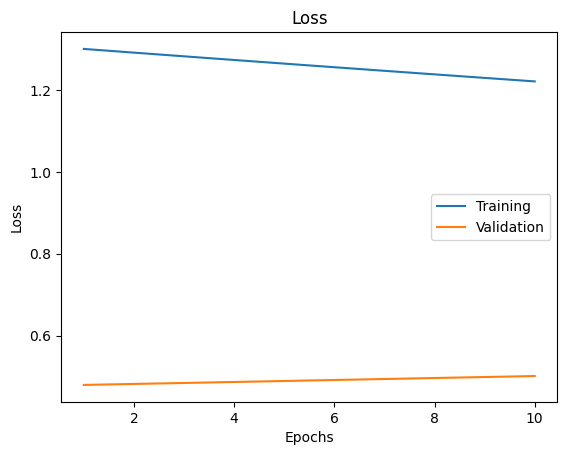

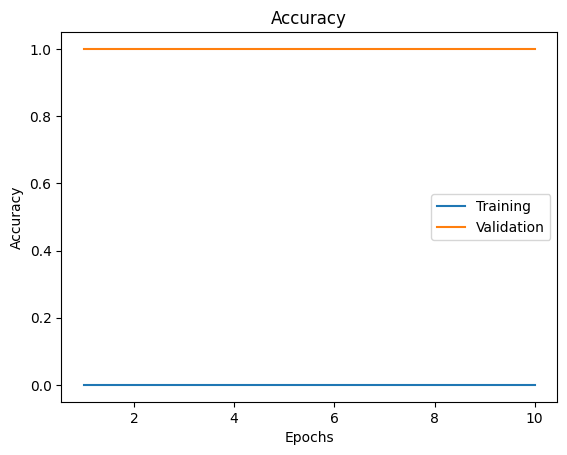

In [22]:
plot_loss(history1)
plot_accuracy(history1)

### inizio modifiche

In [23]:
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Supponiamo che il tuo dataset sia un DataFrame chiamato df
# df = pd.read_csv('tuo_dataset.csv')  # Carica i dati

# Seleziona le colonne di input e il target
X = df_train_data.drop('default payment next month', axis=1)  # Rimuovi la colonna target
y = df_train_data['default payment next month']  # Colonna target

# Splitta il dataset in training e test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizza i dati (se necessario)
x_train = x_train.astype('float32') / x_train.max()  # Normalizza i dati a [0, 1]
x_test = x_test.astype('float32') / x_test.max()

# Se 'y_train' è binaria (0 o 1), non hai bisogno di to_categorical.
# Se hai più classi, utilizza to_categorical.
y_train = to_categorical(y_train)  # Solo se hai più classi (0, 1)



In [24]:
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

Input Shape = 24
Number classes = Output Shape = 2


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362 (5.32 KB)

 Trainable params: 1,362 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
model.fit(x_train, y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5000 - loss: nan


In [28]:
# predict
predictions = model.predict(x_test)

int_predictions = np.argmax(predictions, axis=1)

print(int_predictions[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0]


iperparametri da vedere

In [29]:
# build the network 
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

optimizer = SGD(learning_rate=0.001)

#model.compile(optimizer=optimizer, loss='categorical_crossentropy',
#              metrics=['accuracy'])

model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

Input Shape = 24
Number classes = Output Shape = 2


In [30]:
# training
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/50
1/1 

In [31]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

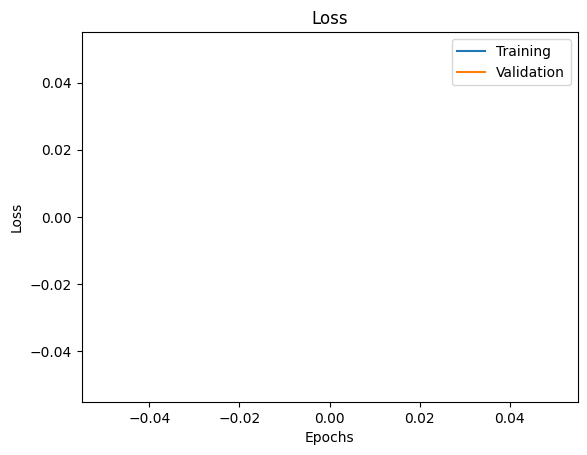

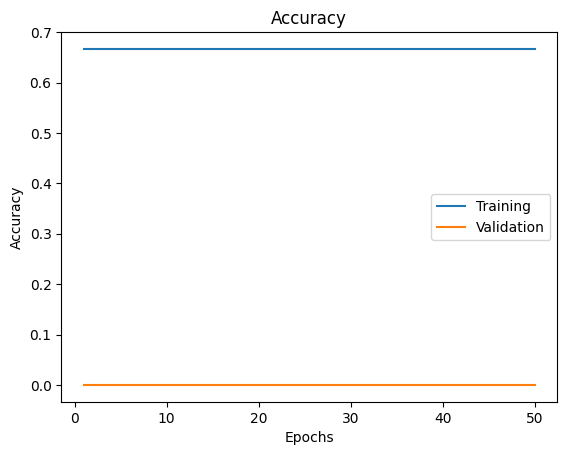

In [32]:
plot_loss(history)
plot_accuracy(history)

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

## Validate the model and comment the results

please describe the evaluation procedure on a validation set, commenting the generalization capability of your model (e.g. under/overfitting). You may also describe the performance metrics that you choose: what is the most suitable performance measure (or set of performance measures) in this case/dataset, according to you? Why?

## Make predictions (on the provided test set)

Based on the results obtained and analyzed during the training and the validation phases, what are your (rather _personal_) expectations with respect to the performances of your model on the blind external test set? Briefly motivate your answer.

# OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).